# Introduction to Artificial Neural Networks with Keras

## From Biological to Artificial Neurons

### The Perceptron

#### Common step functions used in Perceptrons
$heaviside(z) = \begin{cases}0 &\mbox{if } z<0 \\ 1 &\mbox{if } z\geq 0\end{cases}\newline$
$sng(z) = \begin{cases}-1 &\mbox{if } z<0 \\ 0 &\mbox{z = 0} \\ 1 &\end{cases}$

#### Computing the outputs of a fully connected layer
$h_{W,b}(X) = \phi(XW + b)$

#### Perceptron learning rule (weight update)
$w_{i,j}^{(next step)} = w_{i,j} + \eta(y_j - \hat{y}_j)x_i$

$\begin{cases}w_{i,j} \mbox{ is the connection weight between the } i^{th} \mbox{ input neuron and the $j^{th}$ output neuron} \\ x_i \mbox{ is the } i^{th} \mbox{ input value of the current training instance} \\ \hat{y}_j \mbox{ is the output of the } j^{th} \mbox{ output neuron for the current training instance.} \\ y_j \mbox{ is the target output of the } j^{th} \mbox{ output neuron for the current trianing instance}\\ \eta \mbox{ is the learning rate.} \end{cases}$

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[0]


### Multi-Layer Perceptron and Backpropagation

#### Other Activation Functions
* Sigmoid: $\sigma(z) = \dfrac{1}{1+e^{-z}}$
* Hyperbolic Tangent: $tanh(z) = 2\sigma(2z) - 1$
* Rectified Linear Unit: $ReLU(z) = max(0, z)$

### Regression MLPs

#### Typical Regression MLP Archtecture
* Input neurons: One per input feature (e.g., 28x28 = 784 for MNIST).
* Hidden Layers: Depends on the problem. Typically 1 to 5.
* Neurons per Hidden Layer: Depends on the problem. Typically 10 to 100.
* Output neurons: 1 per prediction dimension.
* Hidden Activation: ReLU (or SELU).
* Output Activation: None or ReLU/Softplus (if positive outputs) or Logistc/Tanh (if bounded outputs).
* Loss Function: MSE or MAE/Huber (if outliers).

### Classification MLPs

#### Typical Classification MLP Architeture

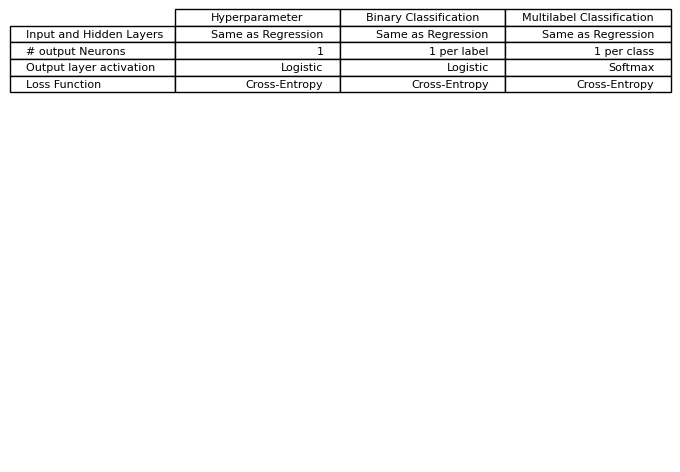

In [2]:
import matplotlib.pyplot as plt
rowlabels = ["Input and Hidden Layers", "# output Neurons", 
             "Output layer activation", "Loss Function"]
columnLabels = ["Hyperparameter", "Binary Classification",
               "Multilabel Classification", "Multiclass Classification"]
content = [["Same as Regression", "Same as Regression", "Same as Regression"],
          ["1", "1 per label", "1 per class"],
          ["Logistic", "Logistic", "Softmax"],
          ["Cross-Entropy", "Cross-Entropy", "Cross-Entropy"]]

fig, ax = plt.subplots()
ax.table(content, rowLabels=rowlabels, colLabels=columnLabels, loc='top')
ax.axis("off")
plt.show()

## Implementing MLPs with Keras

In [3]:
import tensorflow as tf
from tensorflow import keras 
tf.__version__

2023-05-20 12:49:44.752720: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-20 12:49:45.041180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2023-05-20 12:49:45.041196: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-20 12:49:46.002665: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object

'2.11.0'

In [4]:
keras.__version__

'2.11.0'

### Building an Image Classifier Using the Sequential API

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/ 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

2023-05-20 12:49:47.572500: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2023-05-20 12:49:47.572702: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-20 12:49:47.572720: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (emanueloliveira-CI581128TBW10): /proc/driver/nvidia/version does not exist
2023-05-20 12:49:47.573440: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
model.layers[1].name

'dense_3'

In [14]:
hidden1 = model.get_layer('dense_3')

In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[-0.04216391, -0.0626348 , -0.02345854, ...,  0.0037446 ,
        -0.01793515, -0.05569954],
       [-0.04366107,  0.00240883, -0.02530409, ...,  0.03828272,
         0.00708132, -0.01472627],
       [ 0.01542345,  0.05168699,  0.0027468 , ...,  0.03788518,
         0.00063904,  0.00131867],
       ...,
       [ 0.04682733,  0.06859499,  0.07316405, ...,  0.05403824,
         0.02236035, -0.02925783],
       [ 0.04059707,  0.04792614, -0.00391485, ..., -0.01293845,
         0.04854739,  0.02192508],
       [-0.06026062,  0.01969152,  0.04518333, ..., -0.00141518,
         0.00604449,  0.05200315]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7040 - accuracy: 0.7703 - val_loss: 0.5034 - val_accuracy: 0.8306
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4813 - accuracy: 0.8309 - val_loss: 0.4459 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4395 - accuracy: 0.8443 - val_loss: 0.4249 - val_accuracy: 0.8566
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4113 - accuracy: 0.8545 - val_loss: 0.3962 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3926 - accuracy: 0.8625 - val_loss: 0.4100 - val_accuracy: 0.8554
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8679 - val_loss: 0.3679 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3630 - accuracy: 0.8714 - val_loss: 0.3576 - val_accuracy:

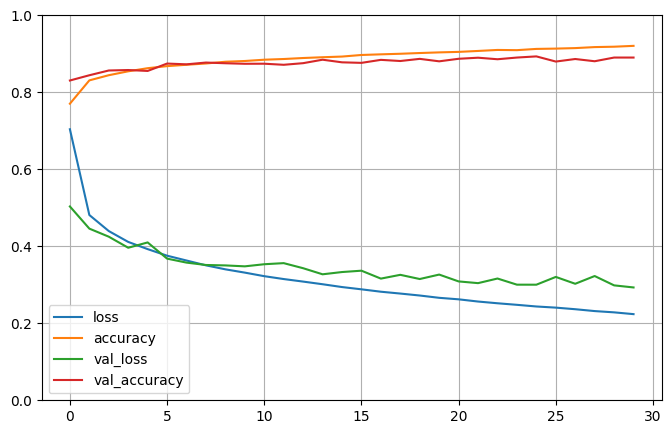

In [22]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 63.6231 - accuracy: 0.8488


[63.62307357788086, 0.848800003528595]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 58ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Building a Regression MLP Using the Sequential API

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                             housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.fit_transform(X_valid)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1),
])
model.compile(
    loss = "mean_squared_error",
    optimizer="sgd",
)
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data= (X_valid, y_valid),
)

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s 1

### Building Complex Models Using the Functional API

In [28]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [29]:
model.compile(
    loss = "mean_squared_error",
    optimizer="sgd",
)
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_data= (X_valid, y_valid),
)

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 0s 1

In [30]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [31]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [32]:
history = model.fit(
    (X_train_A, X_train_B), y_train,
    epochs=20,
    validation_data= ((X_valid_A, X_valid_B), y_valid)
)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==============================] - 1s 2

In [33]:
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                          outputs=[output, aux_output])

In [34]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [35]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: nan - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: nan
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: nan - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: nan
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: nan - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: nan - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: nan
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: nan - dense_14_loss: nan - dense_15_loss: nan - val_loss: nan - val_dense_14_loss: nan - val_dense_15_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - lo

In [36]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 894us/step - loss: nan - dense_14_loss: nan - dense_15_loss: nan


In [37]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 44ms/step


### Building Dynamic Models Using the Subclassing API

In [38]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., none)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

### Saving and Restoring a Model

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1),
])

model.compile(
    loss = "mean_squared_error",
    optimizer="sgd",
)

In [40]:
model.save("my_keras_model.h5")

In [41]:
model = keras.models.load_model("my_keras_model.h5")

### Using Callbacks

In [42]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(
    X_train, y_train, 
    epochs = 10,
    callbacks = [checkpoint_cb],
)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: nan
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: nan
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: nan
Epoch 10/10
363/363 [==============================] - 1s 1ms/step - loss: nan


In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                   validation_data = (X_valid, y_valid),
                   callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan


In [44]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan


In [45]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

### Visualization Using TensorBoard

In [46]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [47]:
run_logdir = get_run_logdir()

In [48]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] - 1s 2

In [49]:
help(keras.callbacks.TensorBoard)

Help on class TensorBoard in module keras.callbacks:

class TensorBoard(Callback, keras.utils.version_utils.TensorBoardVersionSelector)
 |  TensorBoard(*args, **kwargs)
 |  
 |  Enable visualizations for TensorBoard.
 |  
 |  TensorBoard is a visualization tool provided with TensorFlow.
 |  
 |  This callback logs events for TensorBoard, including:
 |  
 |  * Metrics summary plots
 |  * Training graph visualization
 |  * Weight histograms
 |  * Sampled profiling
 |  
 |  When used in `Model.evaluate`, in addition to epoch summaries, there will be
 |  a summary that records evaluation metrics vs `Model.optimizer.iterations`
 |  written. The metric names will be prepended with `evaluation`, with
 |  `Model.optimizer.iterations` being the step in the visualized TensorBoard.
 |  
 |  If you have installed TensorFlow with pip, you should be able
 |  to launch TensorBoard from the command line:
 |  
 |  ```
 |  tensorboard --logdir=path_to_your_logs
 |  ```
 |  
 |  You can find more informa

### Fine-Tuning Neural Network Hyperparameters

In [50]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [51]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_6919/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [52]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
1/1 [==============================] - 0s 35ms/step


In [53]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,
                                  cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 788us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/s

242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 766us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 

242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 708us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 

242/242 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
121/121 [==============================] - 0s 922us/step - loss: nan
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 

242/242 [==============================] - 0s 1ms/step - loss: 1536393227223957504.0000 - val_loss: 914936610821242880.0000
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 590265395668058112.0000 - val_loss: 351509331914522624.0000
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 226773568854163456.0000 - val_loss: 135046098342379520.0000
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 87123875455827968.0000 - val_loss: 51883187755810816.0000
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 33472067412164608.0000 - val_loss: 19932941073252352.0000
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 12859619563012096.0000 - val_loss: 7658030841724928.0000
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 4940530408488960.0000 - val_loss: 2942135275880448.0000
Epoch 15/100
242/242 [==============================] - 0s 2ms/step - lo

242/242 [==============================] - 0s 2ms/step - loss: 1.3436 - val_loss: 1.3617
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3436 - val_loss: 1.3617
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3436 - val_loss: 1.3617
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3436 - val_loss: 1.3617
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3436 - val_loss: 1.3617
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3436 - val_loss: 1.3617
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 1.3436 - val_loss: 1.3617
Epoch 88/100
121/121 [==============================] - 0s 744us/step - loss: 1.2781
Epoch 1/100


/home/emanueloliveira/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:953: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan -1.32534571         nan         nan
         nan         nan         nan         nan]
  warnings.warn(


363/363 [==============================] - 1s 1ms/step - loss: 230806814720.0000 - val_loss: 1.3718
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3220 - val_loss: 1.3660
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3227 - val_loss: 1.3623
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3224 - val_loss: 1.3616
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3225 - val_loss: 1.3639
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3227 - val_loss: 1.3636
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3223 - val_loss: 1.3655
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 1.3221 - val_loss: 1.3622
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3225 - val_loss: 1.3627
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3222 - val_los

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f5f9285ab50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f5f9260f2b0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [54]:
rnd_search_cv.best_params_

{'learning_rate': 0.020632593283106848, 'n_hidden': 3, 'n_neurons': 5}

In [55]:
rnd_search_cv.best_score_

-1.3253457148869832

In [56]:
model = rnd_search_cv.best_estimator_.model

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(model.predict(X_test), y_test)

162/162 [==============================] - 0s 742us/step


1.3334479282761253

### Exercises

#### Question 3.
    A classical perceptron is bounded to a linear model, but if you add some activation function to it, this can change. In this case, you can use the logistic function which will give you a simmilar output as the logistic regression.

#### Question 4.
    Add more perceptrons to neural net without putting activation function will still end up in some linear function, so RNN would not be to valuable. But if add activation functions such as the logistic activation, you can use MLPs to solve non-linear problems, with better results than the classical methods.

#### Question 5.
    * Tanh - Hyperbolic tangent. for x -> +inf, tanh(x) -> 1. for x -> -inf, tanh(x) -> -1.
    * Softmax - Used for probabilities distributions - return values between 0 and 1.
    * ReLU - f(x) = 0 if x < 0 and f(x) = x if x >= 0.
   

#### Question 6.
    * X.shape = (10, )
    * Wh.shape = (50, 10)
    * bh.shape = (50, 1)
    * Wo.shape = (3, 50)
    * bo.shape = (3, 1)
    * Y.shape = (3,)
$Y = ReLU[ReLU(X.Wh + bh).Wo + bo] $

#### Question 7.

In [59]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [66]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [67]:
earlyStopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001)


history = model.fit(
    X_train_full, y_train_full,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[earlyStopping],
)

Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2537 - accuracy: 0.7310 - val_loss: 0.6548 - val_accuracy: 0.7875
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5962 - accuracy: 0.7968 - val_loss: 0.5575 - val_accuracy: 0.8091
Epoch 3/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4960 - accuracy: 0.8280 - val_loss: 0.4776 - val_accuracy: 0.8353
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4556 - accuracy: 0.8405 - val_loss: 0.5486 - val_accuracy: 0.8222
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4224 - accuracy: 0.8530 - val_loss: 0.4795 - val_accuracy: 0.8308
Epoch 6/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4015 - accuracy: 0.8591 - val_loss: 0.4252 - val_accuracy: 0.8555
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3874 - accuracy: 0.8636 - val_loss: 0.4437 - val_ac

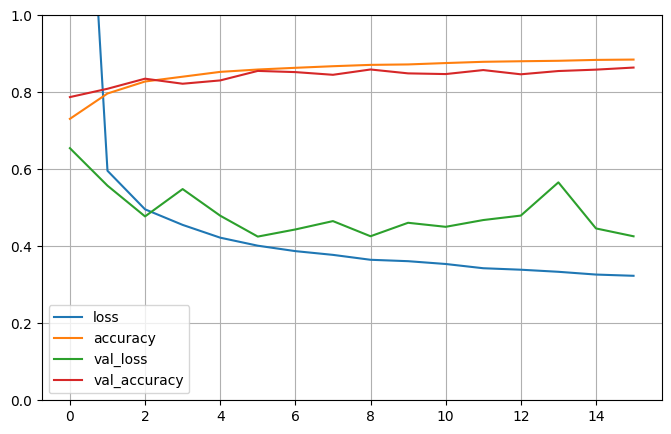

In [68]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()